In [ ]:
!git clone https://github.com/khaled6001/tp-tests.git
!ls tp-tests/ipcv/

Cloning into 'tp-tests'...
remote: Enumerating objects: 109, done.
remote: Counting objects: 100% (109/109), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 109 (delta 25), reused 103 (delta 22), pack-reused 0
Receiving objects: 100% (109/109), 29.73 MiB | 28.94 MiB/s, done.
Resolving deltas: 100% (25/25), done.
 icon01.png   img.ipynb     'Part 1-1.pdf'   sample1.png   sample3.jpg	'TP 1.pdf'   TpDCT.ipynb
 icon1.png    noisepic.png   pic.jpg	     sample2.jpg   sample4.jpg	'TP 2.pdf'   TpDFT.ipynb


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tqdm.notebook import tqdm, trange
import random

(178, 174)


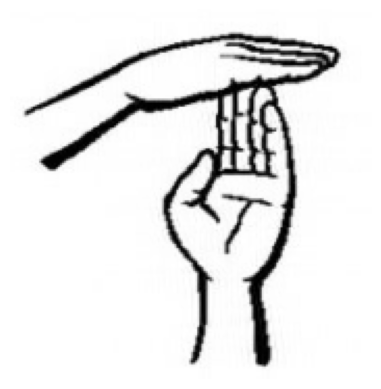

In [ ]:
I = cv2.imread("tp-tests/ipcv/sample1.png", 0)
plt.imshow(I, cmap = "gray");plt.axis("off")
print(I.shape)

(-0.5, 99.5, 99.5, -0.5)

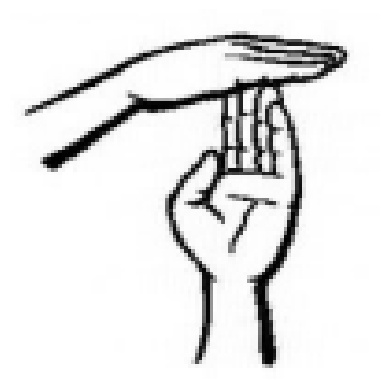

In [ ]:
I = cv2.resize(I,(100, 100))
plt.imshow(I, cmap = "gray");plt.axis("off")

In [ ]:
def DFT(arr):
    width, height = arr.shape
    array = np.copy(arr)
    new_img = np.zeros_like(arr, dtype = np.complexfloating)
    for row in trange(width):
        for column in range(height):
            for x in range(width):
                for y in range(height):
                    new_img[row, column] += (array[x, y] * np.exp(-2j * np.pi * ((row  *  x  / width ) + (column * y / height)))) / (width * height)
    return new_img
new_img = DFT(I)

In [ ]:
def IDFT(arr):
    width, height = arr.shape
    array = np.copy(arr)
    i_new_img = np.zeros_like(I, dtype = np.complexfloating)
    for row in trange(width):
        for column in range(height):
            for x in range(width):
                for y in range(height):
                    i_new_img[row, column] += array[x, y] * np.exp(2j * np.pi * (row * x / width + column * y / height))
    return i_new_img.astype(np.uint8)
i_new_img = IDFT(new_img)

In [ ]:
def energy_Top_Left (arr, value):
    new_restructor = np.copy(arr)
    new_restructor[value:] = 0
    new_restructor[...,value:] = 0
    return new_restructor

**Invese DFT by restructed 5, 10 and 40 respectly pixel**

In [ ]:
img_5 = energy_Top_Left(new_img, 5)
i_new_img_5 = IDFT(img_5)
img_10= energy_Top_Left(new_img, 10)
i_new_img_10 = IDFT(img_10)
img_40 = energy_Top_Left(new_img, 40)
i_new_img_40 = IDFT(img_40)

  0%|          | 0/100 [00:00<?, ?it/s]

<ipython-input-6-b3502d47d8d6>:10: ComplexWarning: Casting complex values to real discards the imaginary part
  return i_new_img.astype(np.uint8)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
def energy_Bottm_Right (arr, value):
    new_restructor = np.copy(arr)
    new_restructor[:-value] = 0
    new_restructor[...,:-value] = 0
    return new_restructor

**Invese DFT by restructed 20, 50 and 90 pixel Bottm Right**

In [ ]:
img_20 = energy_Bottm_Right(new_img, 20)
i_new_img_20 = IDFT(img_20)
img_50 = energy_Bottm_Right(new_img, 50)
i_new_img_50 = IDFT(img_50)
img_90 = energy_Bottm_Right(new_img, 90)
i_new_img_90 = IDFT(img_90)

  0%|          | 0/100 [00:00<?, ?it/s]

<ipython-input-6-b3502d47d8d6>:10: ComplexWarning: Casting complex values to real discards the imaginary part
  return i_new_img.astype(np.uint8)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

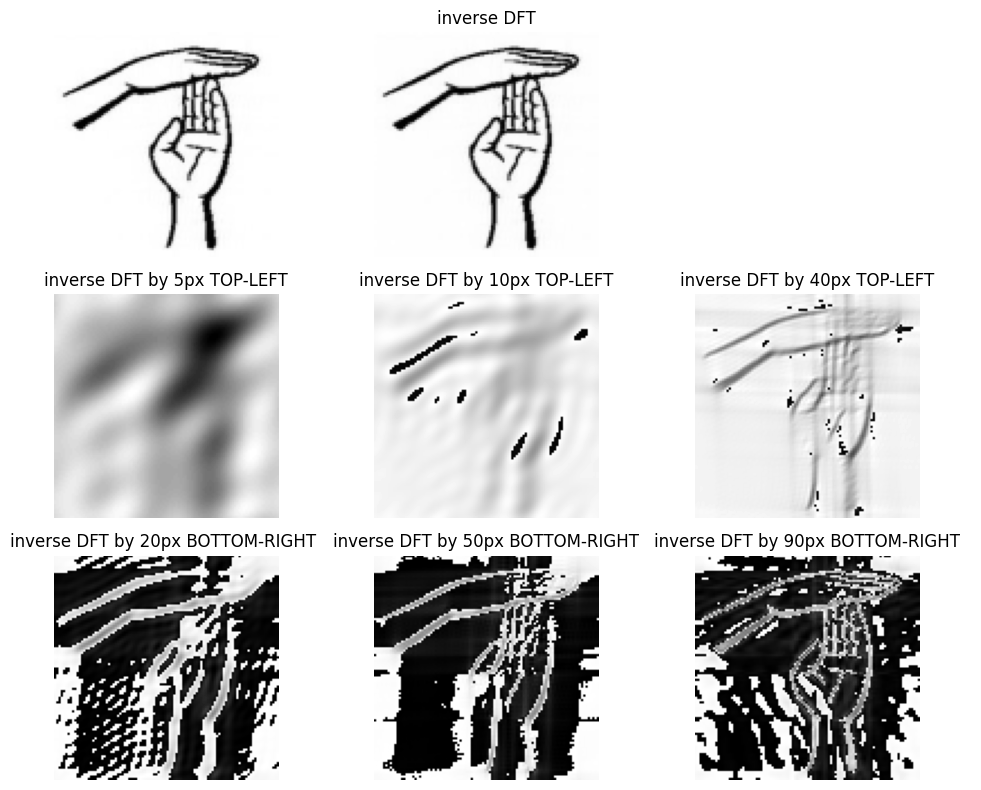

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 8))
axes[0, 0].imshow(I, cmap = "gray");axes[0, 0].axis("off");axes[0, 1].set_title("inverse DFT")
axes[0, 2].axis("off")
axes[0, 1].imshow(i_new_img, cmap = "gray");axes[0, 1].axis("off");axes[0, 1].set_title("inverse DFT")
axes[1, 0].imshow(i_new_img_5, cmap = "gray");axes[1, 0].axis("off");axes[1, 0].set_title("inverse DFT by 5px TOP-LEFT")
axes[1, 1].imshow(i_new_img_10, cmap = "gray");axes[1, 1].axis("off");axes[1, 1].set_title("inverse DFT by 10px TOP-LEFT")
axes[1, 2].imshow(i_new_img_40, cmap = "gray");axes[1, 2].axis("off");axes[1, 2].set_title("inverse DFT by 40px TOP-LEFT")
axes[2, 0].imshow(i_new_img_20, cmap = "gray");axes[2, 0].axis("off");axes[2, 0].set_title("inverse DFT by 20px BOTTOM-RIGHT ")
axes[2, 1].imshow(i_new_img_50, cmap = "gray");axes[2, 1].axis("off");axes[2, 1].set_title("inverse DFT by 50px BOTTOM-RIGHT")
axes[2, 2].imshow(i_new_img_90, cmap = "gray");axes[2, 2].axis("off");axes[2, 2].set_title("inverse DFT by 90px BOTTOM-RIGHT")
plt.tight_layout()
plt.show()

In [ ]:
def amplitude(arr):
    R = np.real(arr)
    Im = np.imag(arr)
    return np.sqrt(np.add(np.power(R, 2), np.power(Im, 2)))
def phase(arr):
    R = np.real(arr)
    Im = np.imag(arr)
    return np.arctan2(Im, R)

In [ ]:
def pos(arr) -> np.array:
    width, heigth = arr.shape
    shift = np.zeros_like((width//2, heigth//2))
    toUse = np.copy(arr)

    shift = np.copy(toUse[:width//2, :heigth//2])
    toUse[:width//2, :heigth//2] = toUse[width//2:, heigth//2:]
    toUse[width//2:, heigth//2:] = shift

    shift = np.copy(toUse[width//2:, :heigth//2])
    toUse[width//2:, :heigth//2] = toUse[:width//2, heigth//2:]
    toUse[:width//2, heigth//2:] = shift
    return toUse

In [ ]:
ampl = amplitude(new_img)
phas = phase(new_img)
newAmplitude = pos(ampl)
logAmpl = np.log(newAmplitude)

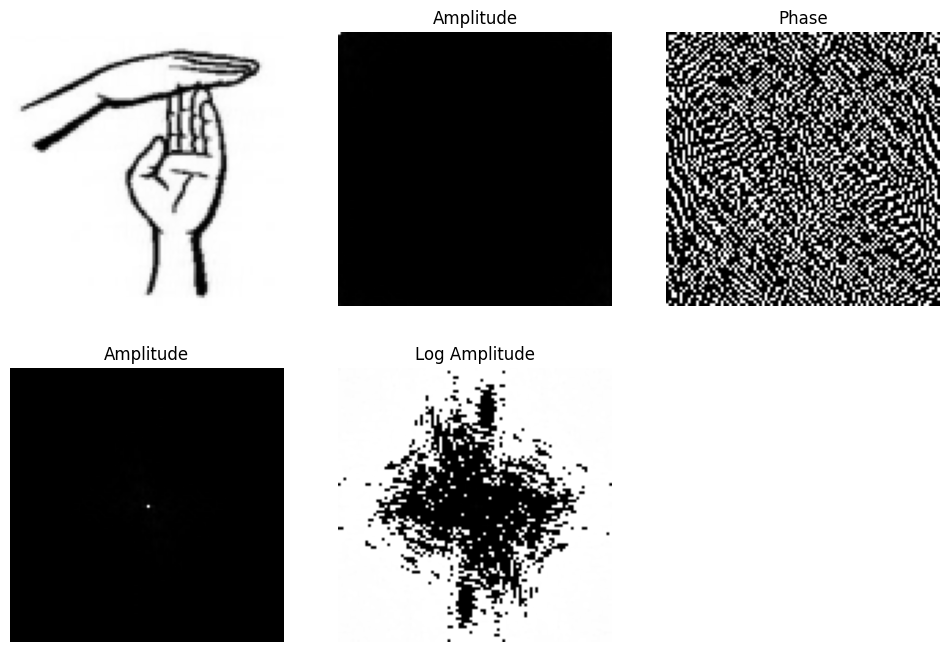

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
axes[0, 0].imshow(I, cmap = "gray");axes[0, 0].axis("off")
axes[0, 1].imshow(ampl.astype(np.uint8), cmap = "gray");axes[0, 1].axis("off");axes[0, 1].set_title("Amplitude")
axes[0, 2].imshow(phas.astype(np.uint8), cmap = "gray");axes[0, 2].axis("off");axes[0, 2].set_title("Phase")
axes[1, 0].imshow(newAmplitude.astype(np.uint8), cmap = "gray");axes[1, 0].axis("off");axes[1, 0].set_title("Amplitude")
axes[1, 1].imshow(logAmpl.astype(np.uint8), cmap = "gray");axes[1, 1].axis("off");axes[1, 1].set_title("Log Amplitude")
axes[1, 2].axis("off")
plt.show()

In [ ]:
def add_noise(img, min, max):
    row , col = img.shape
    number_of_pixels = random.randint(min, max)
    for i in range(number_of_pixels):
        y_coord=random.randint(0, row - 1)
        x_coord=random.randint(0, col - 1)
        img[y_coord][x_coord] = 255
    number_of_pixels = random.randint(min , max)
    for i in range(number_of_pixels):
        y_coord=random.randint(0, row - 1)
        x_coord=random.randint(0, col - 1)
        img[y_coord][x_coord] = 0
    return img

img = cv2.imread('tp-tests/ipcv/sample1.png', cv2.IMREAD_GRAYSCALE)
cv2.imwrite('tp-tests/ipcv/salt-and-pepper-sample1.png', add_noise(img, 200, 500))

True

(178, 174)


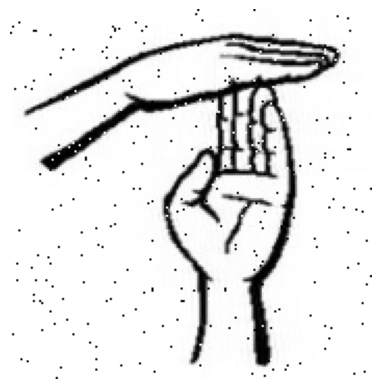

In [ ]:
newI = cv2.imread("tp-tests/ipcv/salt-and-pepper-sample1.png", 0)
plt.imshow(newI, cmap = "gray");plt.axis("off")
print(newI.shape)

(100, 100)

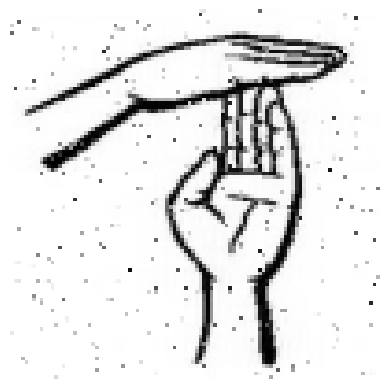

In [ ]:
newI = cv2.resize(newI,(100, 100))
plt.imshow(newI, cmap = "gray");plt.axis("off")
newI.shape

In [ ]:
ni = DFT(newI)
amplI = pos(ni)

NameError: name 'DFT' is not defined

In [ ]:
def filt(arr, C):
    rows, cols = amplI.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.uint8)
    mask[crow - C:crow + C, ccol - C:ccol + C] = 1
    mask = np.multiply(arr, mask)
    return pos(mask)

In [ ]:
def edges(arr, C):
    rows, cols = amplI.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.ones(amplI.shape, np.uint8)
    mask[crow - C:crow + C, ccol - C:ccol + C] = 0
    mask = np.multiply(arr, mask)
    return pos(mask)

In [ ]:
fil = filt(amplI, 10)
fil = IDFT(fil)

NameError: name 'I' is not defined

In [ ]:
edge = edges(amplI, 2)
edge = IDFT(edge)

NameError: name 'I' is not defined

In [ ]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 8))
axes[0].imshow(I, cmap = "gray");axes[0].axis("off");axes[1].set_title("original Image")
axes[1].imshow(fil, cmap = "gray");axes[1].axis("off");axes[1].set_title("Filtered Image")
axes[2].imshow(edge, cmap = "gray");axes[2].axis("off");axes[2].set_title("edges Image")

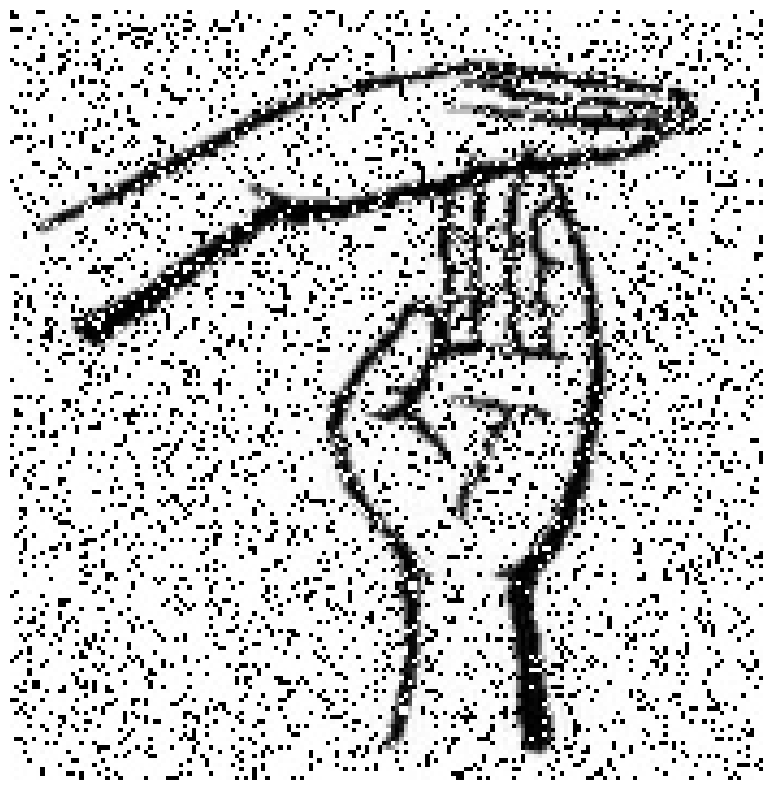

In [ ]:
image = cv2.imread('tp-tests/ipcv/salt-and-pepper-sample2.jpg', cv2.IMREAD_GRAYSCALE)
fig = plt.figure(figsize=(12, 10))
plt.imshow(image, cmap = "gray");plt.axis("off")
plt.show()

In [ ]:
image = cv2.imread('tp-tests/ipcv/salt-and-pepper-sample2.jpg', cv2.IMREAD_GRAYSCALE)
f_transform = np.fft.fft2(image)
f_shift = np.fft.fftshift(f_transform)
C = 80
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
mask = np.zeros((rows, cols), np.uint8)
mask[crow - C:crow + C, ccol - C:ccol + C] = 1
f_shift_filtered = f_shift * mask
f_ishift = np.fft.ifftshift(f_shift_filtered)
image_back = np.fft.ifft2(f_ishift)
image_back = np.abs(image_back)
fig, axes = plt.subplots(ncols=2, figsize=(15, 15))
axes[0].imshow(image, cmap = "gray");axes[0].axis("off");axes[0].set_title('original Image')
axes[1].imshow(image_back, cmap = "gray");axes[1].axis("off");axes[1].set_title('Filtered Image')
plt.show()

In [ ]:
image = cv2.imread('tp-tests/ipcv/salt-and-pepper-sample2.jpg', cv2.IMREAD_GRAYSCALE)
f_transform = np.fft.fft2(image)
f_shift = np.fft.fftshift(f_transform)
C = 13
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
mask = np.ones((rows, cols), np.uint8)
mask[crow - C:crow + C, ccol - C:ccol + C] = 0
f_shift_filtered = f_shift * mask
f_ishift = np.fft.ifftshift(f_shift_filtered)
image_back = np.fft.ifft2(f_ishift)
image_back = np.abs(image_back)
fig, axes = plt.subplots(ncols=2, figsize=(15, 15))
axes[0].imshow(image, cmap = "gray");axes[0].axis("off");axes[0].set_title('original Image')
axes[1].imshow(image_back, cmap = "gray");axes[1].axis("off");axes[1].set_title('edges Image')
plt.show()